EDA DEBUNKING MENSTRUAL MYTHS

In [59]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

EDA menstrual_cycle_with_factos.csv

In [60]:
df_mcwf = pd.read_csv("../files/raw/menstrual_cycle_with_factors.csv")

In [61]:
df_mcwf.head()

,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Diet,Cycle Start Date,Cycle Length,Period Length,Next Cycle Start Date,Symptoms
0,1,18,29.28,2,Moderate,5.4,Low Carb,2024-11-13 20:52:34.915012,26,7,2024-12-09 20:52:34.915012,Headache
1,1,18,29.28,2,Moderate,5.4,Low Carb,2024-12-09 20:52:34.915012,32,5,2025-01-10 20:52:34.915012,Fatigue
2,1,18,29.28,2,Moderate,5.4,Low Carb,2025-01-10 20:52:34.915012,41,7,2025-02-20 20:52:34.915012,Fatigue
3,1,18,29.28,2,Moderate,5.4,Low Carb,2025-02-20 20:52:34.915012,27,3,2025-03-19 20:52:34.915012,Fatigue
4,1,18,29.28,2,Moderate,5.4,Low Carb,2025-03-19 20:52:34.915012,42,5,2025-04-30 20:52:34.915012,Cramps


In [62]:
df_mcwf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User ID                895 non-null    int64  
 1   Age                    895 non-null    int64  
 2   BMI                    895 non-null    float64
 3   Stress Level           895 non-null    int64  
 4   Exercise Frequency     895 non-null    object 
 5   Sleep Hours            895 non-null    float64
 6   Diet                   895 non-null    object 
 7   Cycle Start Date       895 non-null    object 
 8   Cycle Length           895 non-null    int64  
 9   Period Length          895 non-null    int64  
 10  Next Cycle Start Date  895 non-null    object 
 11  Symptoms               895 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.0+ KB


In [63]:
df.isna().sum()

User ID                  0
Age                      0
BMI                      0
Stress Level             0
Exercise Frequency       0
Sleep Hours              0
Diet                     0
Cycle Start Date         0
Cycle Length             0
Period Length            0
Next Cycle Start Date    0
Symptoms                 0
dtype: int64

In [64]:
df_mcwf.duplicated().sum()


0

In [65]:
df_mcwf[df_mcwf["User ID"]== 1]


,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Diet,Cycle Start Date,Cycle Length,Period Length,Next Cycle Start Date,Symptoms
0,1,18,29.28,2,Moderate,5.4,Low Carb,2024-11-13 20:52:34.915012,26,7,2024-12-09 20:52:34.915012,Headache
1,1,18,29.28,2,Moderate,5.4,Low Carb,2024-12-09 20:52:34.915012,32,5,2025-01-10 20:52:34.915012,Fatigue
2,1,18,29.28,2,Moderate,5.4,Low Carb,2025-01-10 20:52:34.915012,41,7,2025-02-20 20:52:34.915012,Fatigue
3,1,18,29.28,2,Moderate,5.4,Low Carb,2025-02-20 20:52:34.915012,27,3,2025-03-19 20:52:34.915012,Fatigue
4,1,18,29.28,2,Moderate,5.4,Low Carb,2025-03-19 20:52:34.915012,42,5,2025-04-30 20:52:34.915012,Cramps
5,1,18,29.28,2,Moderate,5.4,Low Carb,2025-04-30 20:52:34.915012,41,5,2025-06-10 20:52:34.915012,Fatigue
6,1,18,29.28,2,Moderate,5.4,Low Carb,2025-06-10 20:52:34.915012,31,4,2025-07-11 20:52:34.915012,Headache
7,1,18,29.28,2,Moderate,5.4,Low Carb,2025-07-11 20:52:34.915012,48,7,2025-08-28 20:52:34.915012,Fatigue
8,1,18,29.28,2,Moderate,5.4,Low Carb,2025-08-28 20:52:34.915012,29,3,2025-09-26 20:52:34.915012,Fatigue
9,1,18,29.28,2,Moderate,5.4,Low Carb,2025-09-26 20:52:34.915012,47,4,2025-11-12 20:52:34.915012,Headache


In [66]:
df_mcwf[df_mcwf["User ID"]== 2]


,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Diet,Cycle Start Date,Cycle Length,Period Length,Next Cycle Start Date,Symptoms
11,2,34,29.57,4,Low,5.4,Low Carb,2024-05-21 20:52:34.915109,26,4,2024-06-16 20:52:34.915109,Bloating
12,2,34,29.57,4,Low,5.4,Low Carb,2024-06-16 20:52:34.915109,34,6,2024-07-20 20:52:34.915109,Bloating
13,2,34,29.57,4,Low,5.4,Low Carb,2024-07-20 20:52:34.915109,38,7,2024-08-27 20:52:34.915109,Fatigue
14,2,34,29.57,4,Low,5.4,Low Carb,2024-08-27 20:52:34.915109,29,4,2024-09-25 20:52:34.915109,Mood Swings
15,2,34,29.57,4,Low,5.4,Low Carb,2024-09-25 20:52:34.915109,34,5,2024-10-29 20:52:34.915109,Bloating
16,2,34,29.57,4,Low,5.4,Low Carb,2024-10-29 20:52:34.915109,31,7,2024-11-29 20:52:34.915109,Fatigue
17,2,34,29.57,4,Low,5.4,Low Carb,2024-11-29 20:52:34.915109,34,4,2025-01-02 20:52:34.915109,Mood Swings
18,2,34,29.57,4,Low,5.4,Low Carb,2025-01-02 20:52:34.915109,47,7,2025-02-18 20:52:34.915109,Mood Swings
19,2,34,29.57,4,Low,5.4,Low Carb,2025-02-18 20:52:34.915109,37,5,2025-03-27 20:52:34.915109,Headache


In [67]:
df_mcwf[df_mcwf["User ID"]== 3]


,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Diet,Cycle Start Date,Cycle Length,Period Length,Next Cycle Start Date,Symptoms
20,3,22,29.44,1,Moderate,8.6,Vegetarian,2024-09-29 20:52:34.915155,50,4,2024-11-18 20:52:34.915155,Cramps
21,3,22,29.44,1,Moderate,8.6,Vegetarian,2024-11-18 20:52:34.915155,40,4,2024-12-28 20:52:34.915155,Cramps
22,3,22,29.44,1,Moderate,8.6,Vegetarian,2024-12-28 20:52:34.915155,25,5,2025-01-22 20:52:34.915155,Cramps
23,3,22,29.44,1,Moderate,8.6,Vegetarian,2025-01-22 20:52:34.915155,38,3,2025-03-01 20:52:34.915155,Headache
24,3,22,29.44,1,Moderate,8.6,Vegetarian,2025-03-01 20:52:34.915155,40,3,2025-04-10 20:52:34.915155,Bloating
25,3,22,29.44,1,Moderate,8.6,Vegetarian,2025-04-10 20:52:34.915155,49,3,2025-05-29 20:52:34.915155,Headache
26,3,22,29.44,1,Moderate,8.6,Vegetarian,2025-05-29 20:52:34.915155,28,3,2025-06-26 20:52:34.915155,Mood Swings
27,3,22,29.44,1,Moderate,8.6,Vegetarian,2025-06-26 20:52:34.915155,37,5,2025-08-02 20:52:34.915155,Fatigue
28,3,22,29.44,1,Moderate,8.6,Vegetarian,2025-08-02 20:52:34.915155,49,6,2025-09-20 20:52:34.915155,Headache
29,3,22,29.44,1,Moderate,8.6,Vegetarian,2025-09-20 20:52:34.915155,46,4,2025-11-05 20:52:34.915155,Bloating


<Axes: xlabel='BMI', ylabel='Cycle Length'>

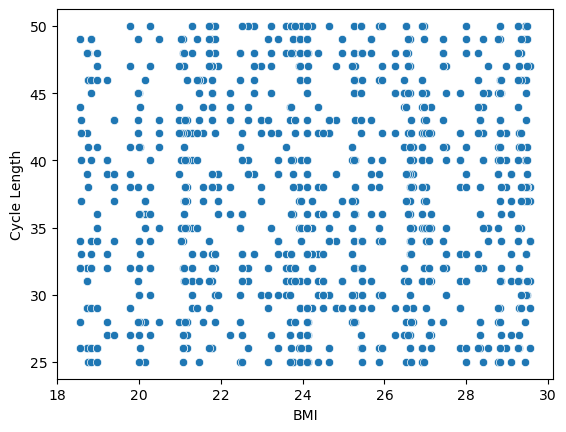

In [68]:
sns.scatterplot(data=df_mcwf, x='BMI', y='Cycle Length')


<Axes: xlabel='Age', ylabel='Cycle Length'>

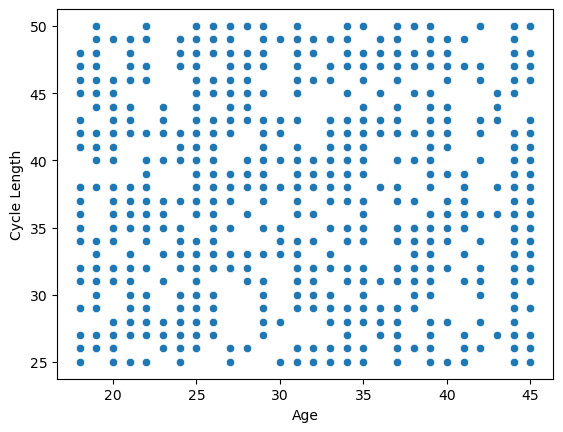

In [69]:
sns.scatterplot(data=df_mcwf, x='Age', y='Cycle Length')


<Axes: xlabel='Cycle Length', ylabel='Sleep Hours'>

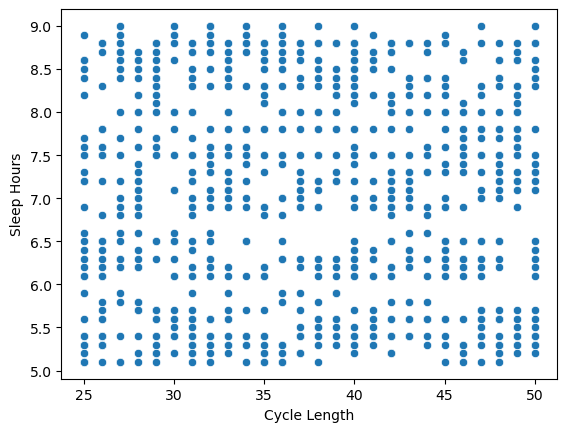

In [70]:
sns.scatterplot(data=df_mcwf, y='Sleep Hours', x='Cycle Length')


<Axes: xlabel='Cycle Length', ylabel='Stress Level'>

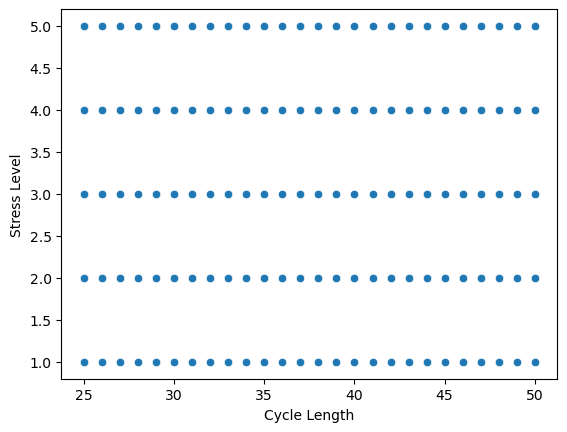

In [71]:
sns.scatterplot(data=df_mcwf, y='Stress Level', x='Cycle Length')


<Axes: xlabel='Diet', ylabel='Cycle Length'>

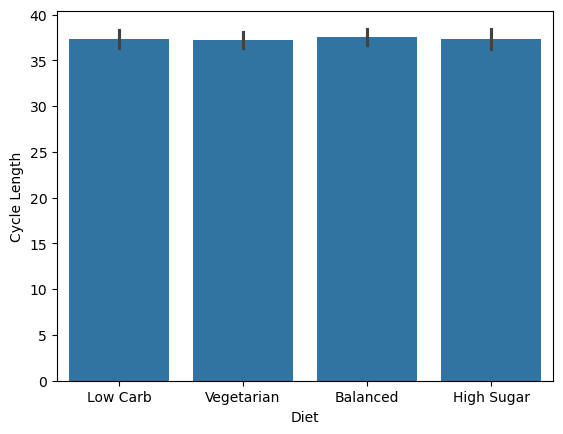

In [72]:
sns.barplot(data=df_mcwf, x='Diet', y='Cycle Length')


<Axes: xlabel='Diet', ylabel='Symptoms'>

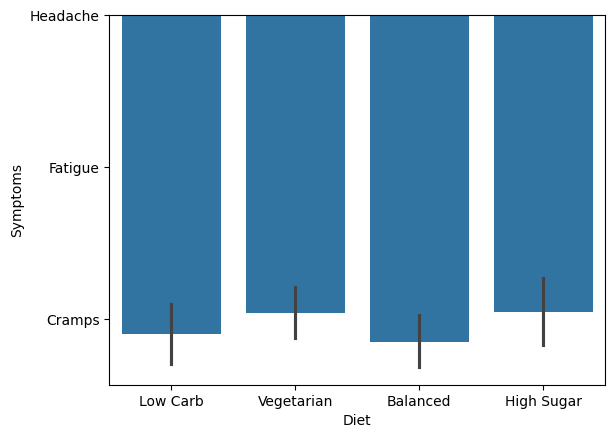

In [73]:
sns.barplot(data=df_mcwf, x='Diet', y='Symptoms')


<Axes: xlabel='Diet', ylabel='count'>

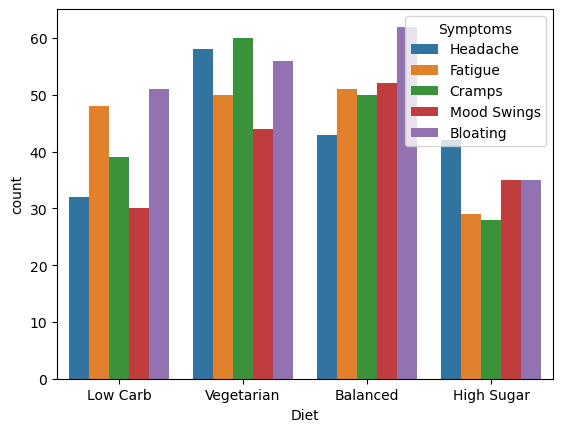

In [74]:
sns.countplot(data=df_mcwf, x='Diet', hue='Symptoms')

<Axes: xlabel='Diet', ylabel='count'>

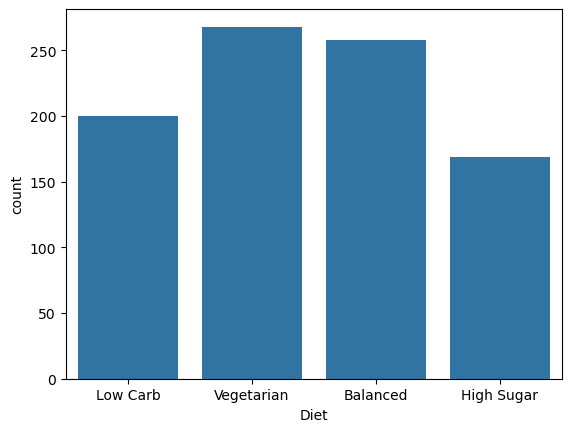

In [75]:
sns.countplot(data=df_mcwf, x='Diet')

EDA menstrual_cycle_lenght.csv

In [77]:
df_mcl = pd.read_csv("../files/raw/menstural_cycle_length.csv")

In [78]:
df_mcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   new_id            3324 non-null   int64  
 1   age               3324 non-null   int64  
 2   cycle_number      3324 non-null   int64  
 3   cycle_start_date  3324 non-null   object 
 4   cycle_end_date    3324 non-null   object 
 5   cycle_length      3144 non-null   float64
 6   conception_cycle  3324 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 181.9+ KB


In [80]:
df_mcl.head(10)


,new_id,age,cycle_number,cycle_start_date,cycle_end_date,cycle_length,conception_cycle
0,1,26,1,5/21/03,6/16/03,27.0,No
1,1,26,2,6/17/03,7/15/03,29.0,No
2,1,26,3,7/16/03,8/13/03,NaN,Yes
3,2,28,2,6/9/03,7/5/03,27.0,No
4,2,28,3,7/6/03,8/9/03,NaN,Yes
5,3,28,1,6/8/03,7/2/03,25.0,No
6,3,28,2,7/3/03,7/28/03,26.0,No
7,3,28,3,7/29/03,8/24/03,27.0,No
8,3,28,4,8/25/03,9/22/03,NaN,Yes
9,4,33,1,6/19/03,7/14/03,26.0,No
